# Final Project Submission

Please fill out:
* Student name: Tino Pietraßyk
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Gathering Information

In [2]:
#import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(28)

In [3]:
raw_df = pd.read_csv("kc_house_data.csv")
raw_df.shape

(21597, 21)

In [4]:
raw_df.isna().sum().sort_values(ascending = False).head()

yr_renovated    3842
waterfront      2376
view              63
sqft_lot15         0
date               0
dtype: int64

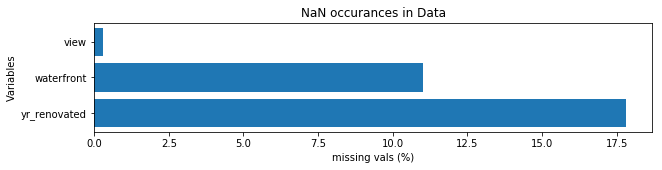

In [5]:
missings_df =pd.DataFrame(round(100*raw_df.isna().sum() / raw_df.id.count(),1).sort_values(ascending = False), columns = ["missings"])
missings_df = missings_df.loc[missings_df.missings!=0]
fig = plt.figure(figsize=(10,2))
plt.barh(missings_df.index,missings_df.missings);
plt.ylabel("Variables");
plt.xlabel("missing vals (%)");
plt.title("NaN occurances in Data");

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Cleaning

Link to Dataset description: https://www.kaggle.com/harlfoxem/housesalesprediction

### Data alterations

In [8]:
cleaned_df = raw_df.copy()

#cleaned_df.sqft_basement=cleaned_df.sqft_basement.apply(lambda x: float(x))

### sqft_Basement

In [9]:
#see the problem
cleaned_df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [10]:
#replace "?" with placeholder and convert to Numbers
cleaned_df.loc[raw_df.sqft_basement == "?", "sqft_basement"] = 99999
cleaned_df.sqft_basement= cleaned_df.sqft_basement.apply(lambda x: float(x))

#set the placeholdervalues to the median
median = cleaned_df.loc[cleaned_df.sqft_basement != 99999, "sqft_basement"].median()
cleaned_df.loc[cleaned_df.sqft_basement == 99999, "sqft_basement"] = median

### yr_renovated

In [11]:
cleaned_df.yr_renovated.isna().sum()

3842

In [12]:
#Transform NaN Values to zeros and keep them for now.
cleaned_df.yr_renovated.fillna(value=0, inplace=True)

<b>Be aware ! Placeholders (0.0) are still present</b>

### view (times house has been viewed by buyers)

In [13]:
cleaned_df.view.isna().sum()

63

In [14]:
#Transform NaN Values to zeros and keep them for now.
cleaned_df.view.fillna(value=0, inplace=True)

In [15]:
cleaned_df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

View Values ranging from 0 to 4

### waterfront (has a view to a waterfront)

In [16]:
cleaned_df.waterfront.isna().sum()

2376

In [17]:
cleaned_df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [18]:
#Columns could be dropped entirely, because there are just a few rows with actual data
#Transform NaN Values to zeros and keep them for now.
cleaned_df.waterfront.fillna(value=0, inplace=True)

### date (date when house was sold)

In [19]:
cleaned_df.date.dtypes

dtype('O')

In [20]:
cleaned_df.date = pd.to_datetime(cleaned_df.date, format="%m/%d/%Y")

In [21]:
cleaned_df.dtypes.head()

id                    int64
date         datetime64[ns]
price               float64
bedrooms              int64
bathrooms           float64
dtype: object

### convert data into metric
Since imperial data does not personally help me with understanding the data and shouldnt be used by anyone anyways I decided to convert area data to the metric system.


In [22]:
## keep a cleaned imperial copy to quickly change Data if needed
cleaned_df_imperial = cleaned_df.copy()

## get a quick overview on which columns need to be inserted to the conversionlist

#for i in range(0,len(cleaned_df.columns)):
#    col = cleaned_df.columns[i]
#    print("{} : {}".format(i,col))

In [23]:
#List of Columns that need to be converted
convert_list = [5,6,12,13,19,20]

#conversion function
def scale (df,cols,scalar,rename=0):
    """Multiplies all values in a column if given a dataframe, a list of column indecies and a scalar"""
    df = df.copy()
    for col in cols:
        df[df.columns[col]]=df[df.columns[col]].apply(lambda x: x*scalar)
        if rename:          
            df=df.rename(columns={df.columns[col]:df.columns[col].replace("sqft","qm")})
    return df

In [24]:
#be aware! only run once!
cleaned_df = scale(cleaned_df,convert_list,1/10.764,1)


In [25]:
cleaned_non_transformed_metric_df = cleaned_df.copy()

### basement

Since basement area does not count into living area for a house I consider it to be feature. Therefor Basement Data i categorized as "has basement" or not

In [26]:
cleaned_df.qm_basement = cleaned_df.qm_basement.apply(lambda x: 1 if x !=0 else 0)

### Overview over cleaned Data

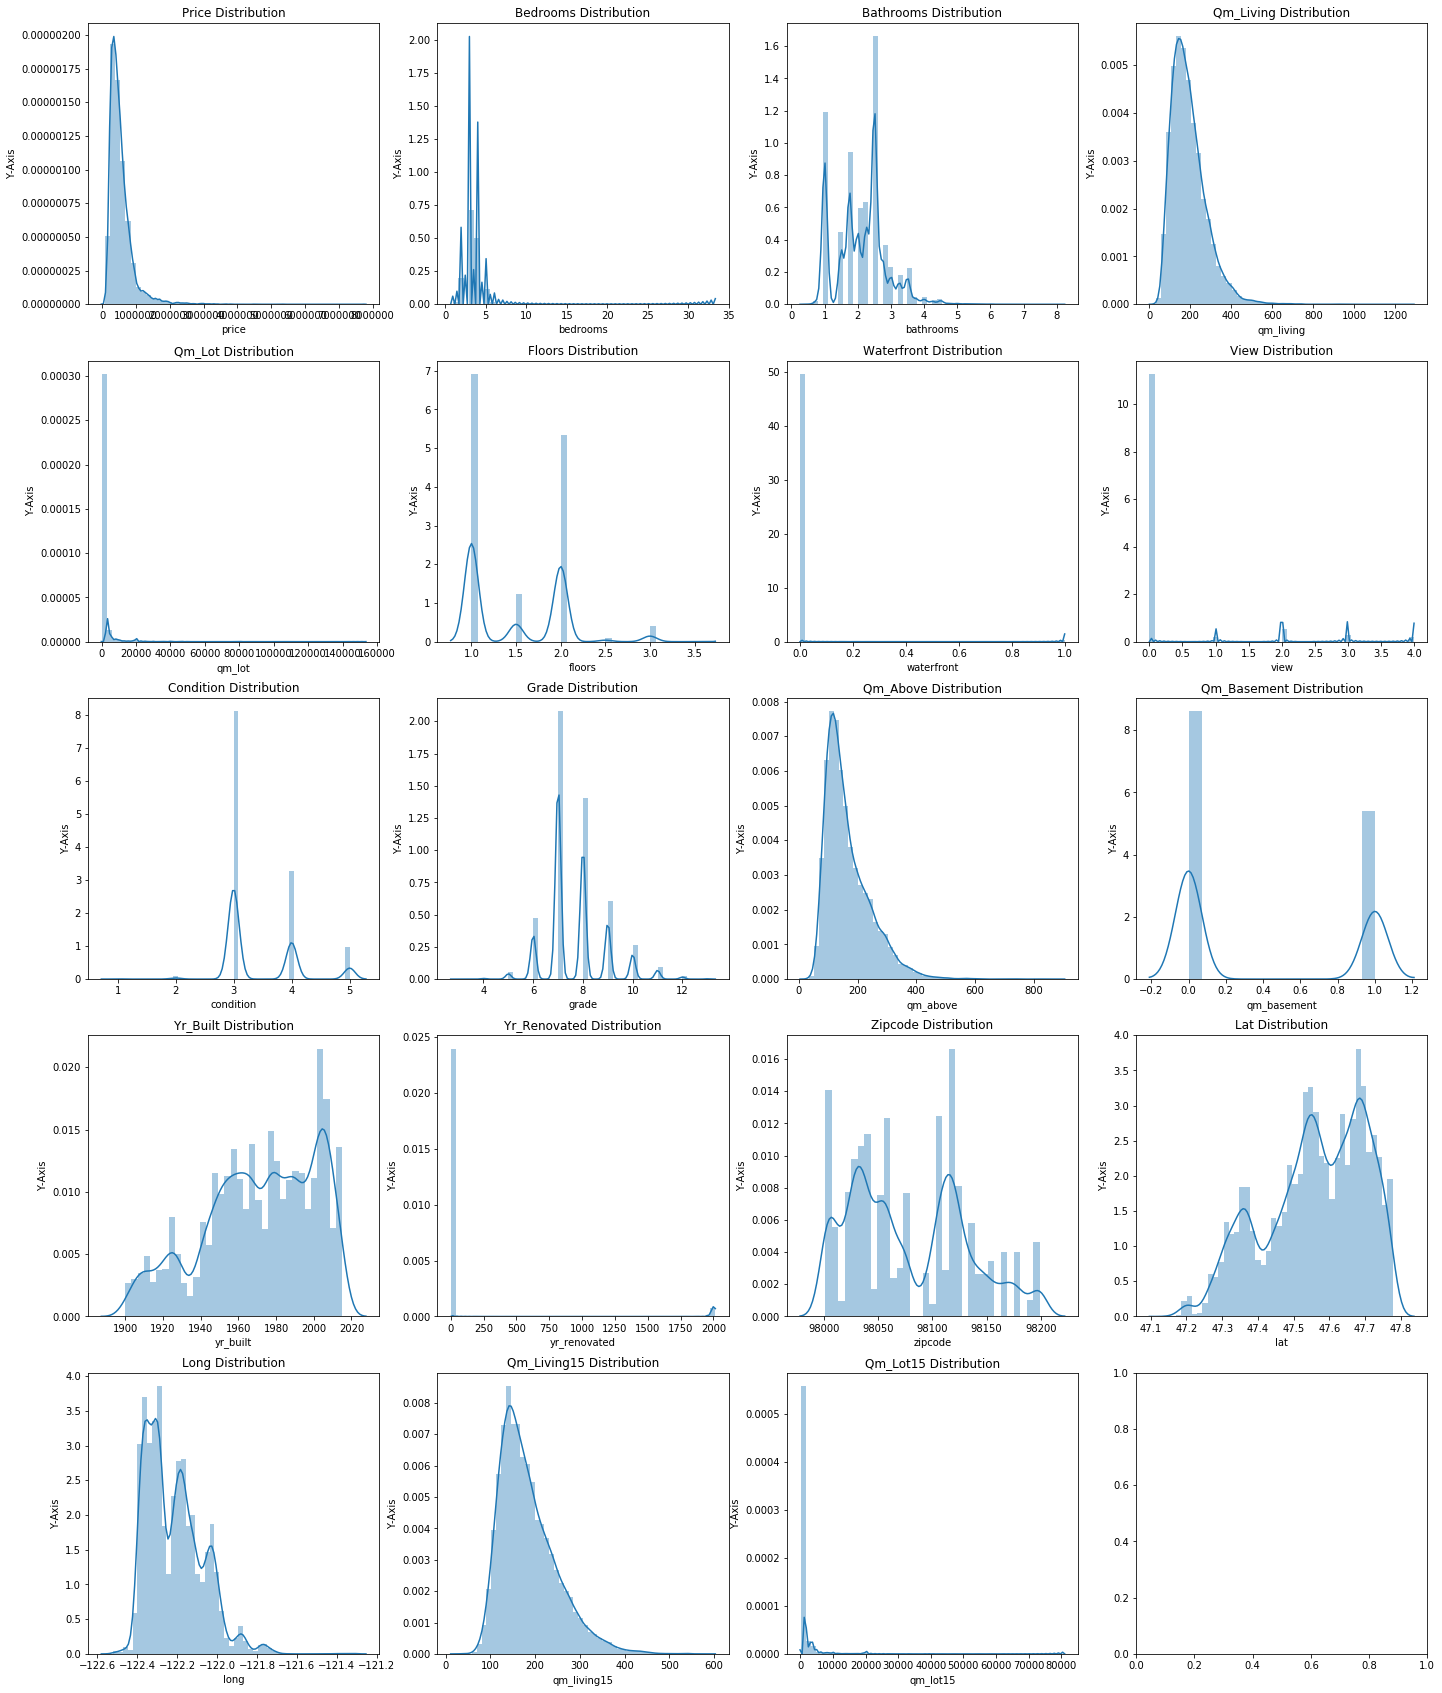

In [27]:
df=cleaned_df
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24,30))
for n,c in enumerate(df.columns[2:]):
    row = n//4
    col = n%4
    ax = axes[row][col]
    sns.distplot(df[c], ax=ax).set(title=c.title()+" Distribution", ylabel="Y-Axis")

Histograms and Distribution plots show:
<table align=left>
    <tr><th>Nominal</th><th>Categorical</th><th>Metric</th><th>Other</th></tr>
<tr><td><ul>
  <li>Zipcode</li>
  <li>Waterfront</li>
    </ul></td>
<td><ul>
<li>Bedrooms</li>
  <li>Bathrooms</li>
  <li>Condition</li>
  <li>Grade</li>
  <li>Floors</li>
  <li>View</li>
</ul></td>
<td><ul>
<li>Price</li>
  <li>sqft_living</li>
  <li>sqft_living15</li>
  <li>sqft_lot</li>
  <li>sqft_lot15</li>
  <li>sqft_above</li>
  <li>sqft_basement</li>
</ul></td>
<td><ul>
<li>date</li>
  <li>long</li>
  <li>lat</li>
</ul></td>
</tr>
</table>

## Applying Transformations

area Data is skewed , so I will apply a log transformation

### log transformation

In [28]:
cleaned_non_transformed_df = cleaned_df.copy()
log_transform_cols = ["price","qm_lot","qm_living","qm_above","qm_living15","qm_lot15"]

In [29]:
#check for Zeros
cleaned_df[log_transform_cols].applymap(lambda x: None if x==0 else True).isnull().sum()


price          0
qm_lot         0
qm_living      0
qm_above       0
qm_living15    0
qm_lot15       0
dtype: int64

In [30]:
def log_transform(df,col_list):
    """Takes in DataFrame and a List of column names, will return Dataframe with
    log transformation apllied to selected columns"""
    df=df.copy()
    for col in col_list:
        df[col]=df[col].apply(lambda x: np.log(x))
    return df
    
    

In [31]:
cleaned_df = log_transform(cleaned_df,log_transform_cols)

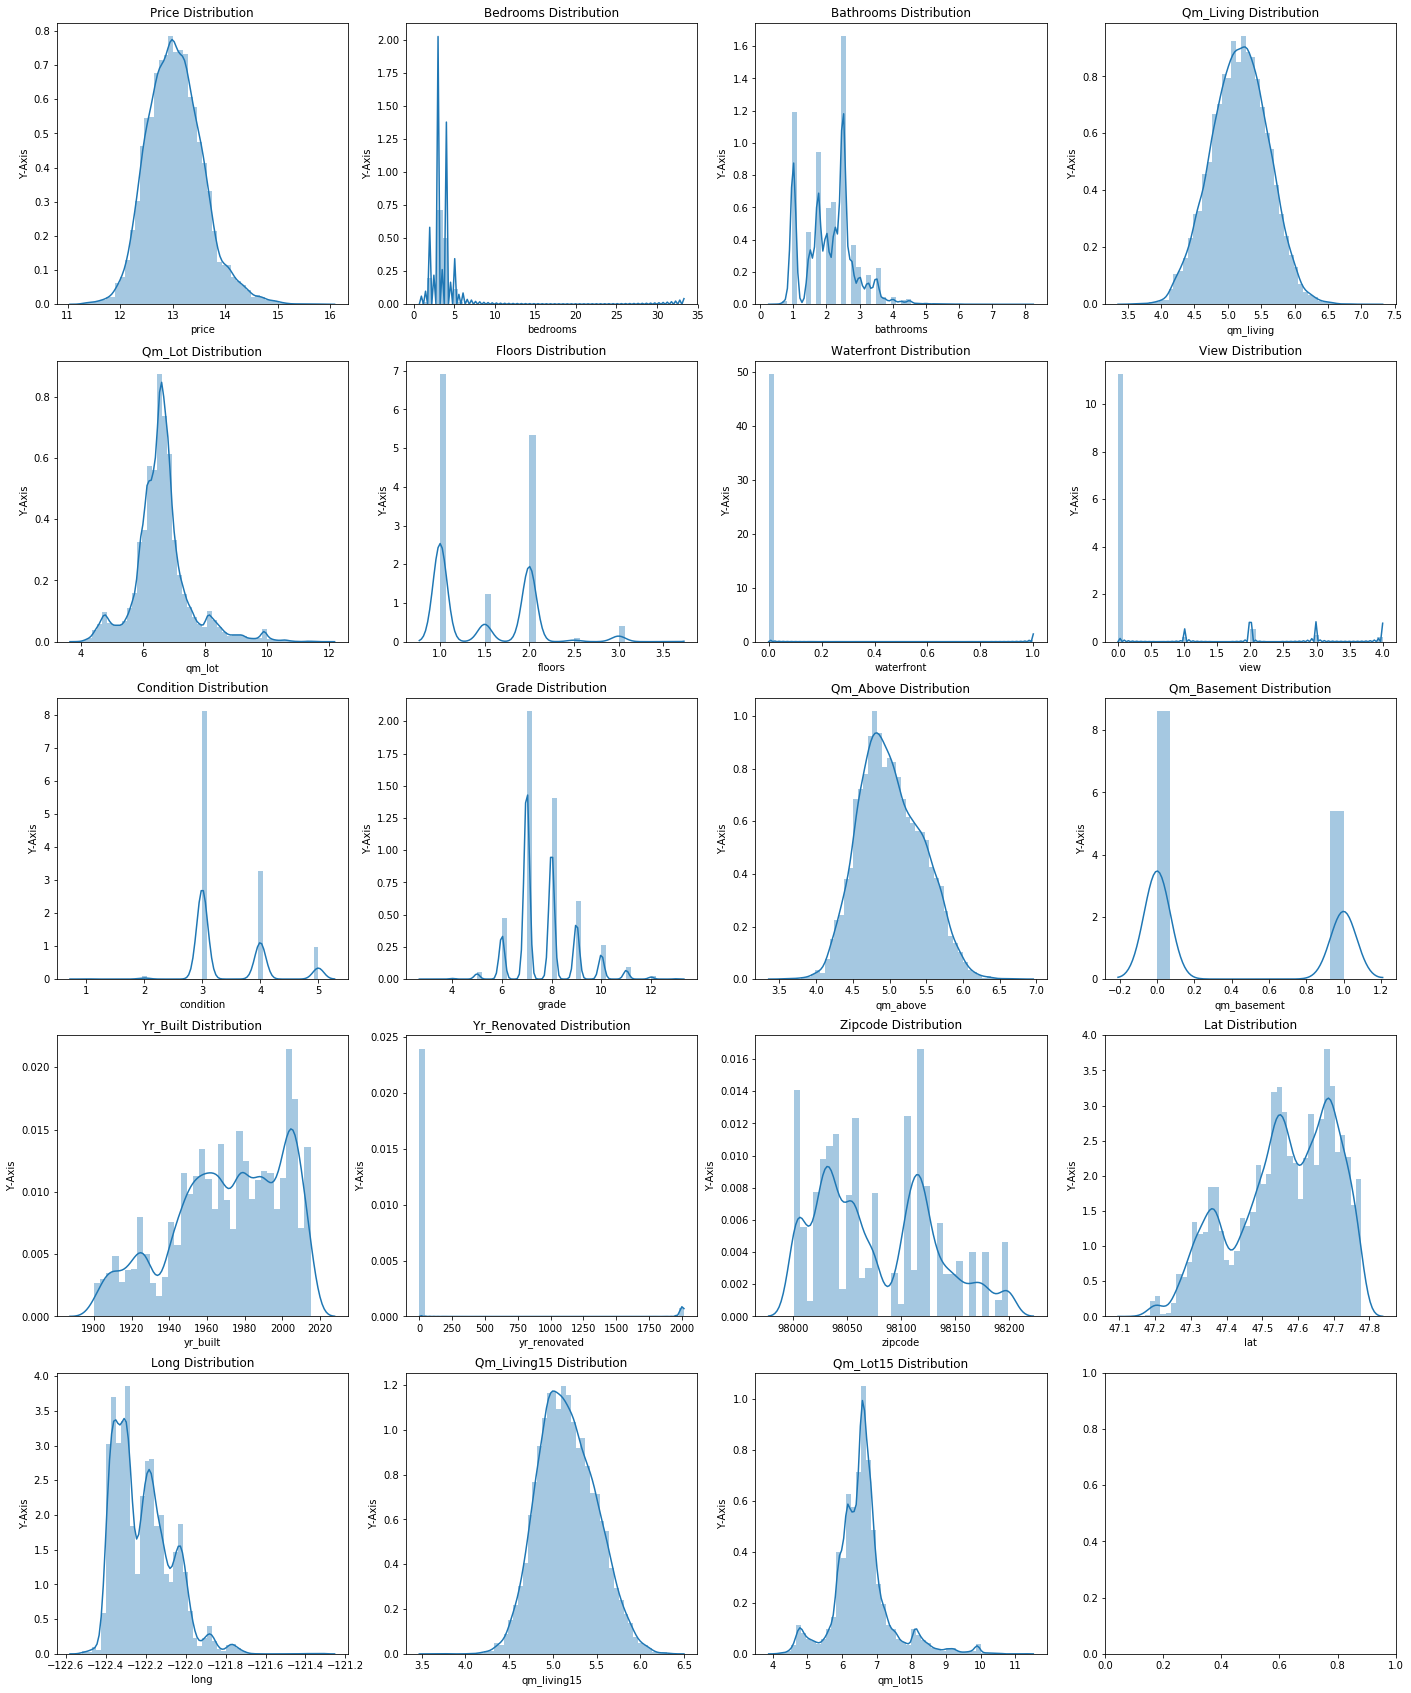

In [32]:
df = cleaned_df
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24,30))
for n,c in enumerate(df.columns[2:]):
    row = n//4
    col = n%4
    ax = axes[row][col]
    sns.distplot(df[c], ax=ax).set(title=c.title()+" Distribution", ylabel="Y-Axis")

### one-hot encoding for categorical values

In [33]:
#define what columns to transform, bins, labels and abbreviations
col_kwargs = [{"name": "bedrooms", "bins":[0,1,2,3,4,5,99], "labels":[1,2,3,4,5,"6+"], "abr":"bed_"},
              {"name": "bathrooms", "bins":[0,0.99,1.99,2.99,3.99,4.99,99], "labels":["shared",1,2,3,4,"5+"],"abr":"bath_"},
              {"name": "floors", "bins":[0,1.1,1.6,2.1,2.6,3.1,99], "labels":[1,1.5,2,2.5,3,3.5],"abr":"flr_"},
              {"name": "grade", "bins":range(0,14), "labels":range(1,14),"abr":"grd_"},
              {"name": "condition", "bins":[0,1,2,3,4,5,99], "labels":[1,2,3,4,5,"5+"],"abr":"cdt_"},
             ]

In [34]:
def dummy_transformation(df,col_kwargs,one_hot = True):
    """run one-hot transformation on target columns. Columns must be passed as a list of dicts
    providing the followong parameters: name(str), bins(list), labels(list), abr(str) , """
    df=df.copy()
    for col in col_kwargs:
        df[col["name"]]=pd.cut(df[col["name"]],bins=col["bins"],labels=col["labels"])
        if one_hot:
            dummy = pd.get_dummies(data=df[col["name"]],prefix=col["abr"],drop_first=True)
            df = pd.concat([df,dummy], axis=1)
            df = df.drop(col["name"], axis=1)
    return df
        
        

In [35]:
cleaned_transformed_non_dummy_df = cleaned_df.copy()
cleaned_transformed_dummy_non_onehot = dummy_transformation(cleaned_df,col_kwargs,False) 
cleaned_transformed_dummy_df = dummy_transformation(cleaned_df,col_kwargs)

In [36]:
corr_df = cleaned_df.corr()
corr_df.applymap(lambda x: x if abs(x)>=0.7 else "")

,id,price,bedrooms,bathrooms,qm_living,qm_lot,floors,waterfront,view,condition,grade,qm_above,qm_basement,yr_built,yr_renovated,zipcode,lat,long,qm_living15,qm_lot15
id,1,,,,,,,,,,,,,,,,,,,
price,,1,,,,,,,,,0.70372,,,,,,,,,
bedrooms,,,1,,,,,,,,,,,,,,,,,
bathrooms,,,,1,0.762135,,,,,,,,,,,,,,,
qm_living,,,,0.762135,1,,,,,,0.743038,0.864979,,,,,,,0.746836,
qm_lot,,,,,,1,,,,,,,,,,,,,,0.918665
floors,,,,,,,1,,,,,,,,,,,,,
waterfront,,,,,,,,1,,,,,,,,,,,,
view,,,,,,,,,1,,,,,,,,,,,
condition,,,,,,,,,,1,,,,,,,,,,


In [37]:
corr_df.price.sort_values(ascending=False).head()

price          1.000000
grade          0.703720
qm_living      0.674802
qm_living15    0.607154
qm_above       0.586013
Name: price, dtype: float64

## Likelyhood Analysis - What makes a house more likely to be sold?

The underlying kc-housing data set provides only data of those houses that where sold in KC ,meaning that the distribution of features should be a good estimator on how likely a feature combination will result in a sell.

I will investigate the following features, since they are the most basic:
* Number of Bedrooms
* Number of Bathrooms
* Living Space

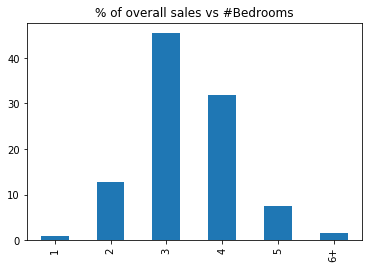

In [38]:
# Bedrooms
df = cleaned_transformed_dummy_non_onehot
(df.bedrooms.value_counts(normalize=True).sort_index()*100).plot.bar(title="% of overall sales vs #Bedrooms");

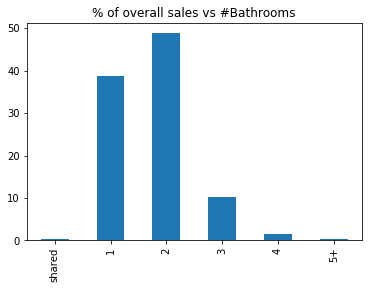

In [39]:
# Bathrooms
(df.bathrooms.value_counts(normalize=True).sort_index()*100).plot.bar(title="% of overall sales vs #Bathrooms");

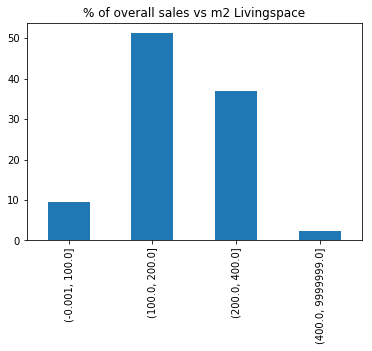

In [40]:
# Livingspace
df=cleaned_non_transformed_metric_df
(df.qm_living.value_counts(bins=[0,100,200,400,9999999], normalize=True).sort_index()*100).plot.bar(title="% of overall sales vs m2 Livingspace");

### Results
The most likely combination for a House to be sold is:
* 3 Bedrooms
* 2 Bathrooms
* 100 - 200 m2 of living space

### How are Housing Prices distributed by Location?

In [41]:
#Setting datafram with non log transformed Prices as working df
cleaned_df = cleaned_non_transformed_metric_df.copy()

#scaling and rounding the output to get easily understandable graphs
group_zip_df = round(scale(cleaned_df,[2],1/1000).groupby("zipcode").median(),1).sort_values(by="price",ascending=False)

In [42]:
group_zip_df.head()

,id,price,bedrooms,bathrooms,qm_living,qm_lot,floors,waterfront,view,condition,grade,qm_above,qm_basement,yr_built,yr_renovated,lat,long,qm_living15,qm_lot15
zipcode,,,,,,,,,,,,,,,,,,,
98039,3.262301e+09,1895.0,4.0,3.0,330.7,1596.9,2.0,0.0,0.0,3.0,9.0,288.9,0.0,1966.0,0.0,47.6,-122.2,288.5,1540.6
98004,3.860400e+09,1150.0,4.0,2.5,247.1,1033.0,1.0,0.0,0.0,3.0,9.0,197.9,0.0,1965.0,0.0,47.6,-122.2,236.0,1056.9
98040,4.115701e+09,993.8,4.0,2.5,280.6,1110.3,1.5,0.0,0.0,4.0,9.0,210.4,47.8,1968.0,0.0,47.6,-122.2,267.1,1083.7
98112,5.015002e+09,915.0,3.0,2.2,216.5,411.2,2.0,0.0,0.0,3.0,8.0,173.7,40.4,1927.0,0.0,47.6,-122.3,190.4,418.1
98005,3.504980e+09,765.5,4.0,2.4,232.7,1135.3,1.0,0.0,0.0,4.0,8.0,182.1,25.5,1967.0,0.0,47.6,-122.2,226.2,1079.8


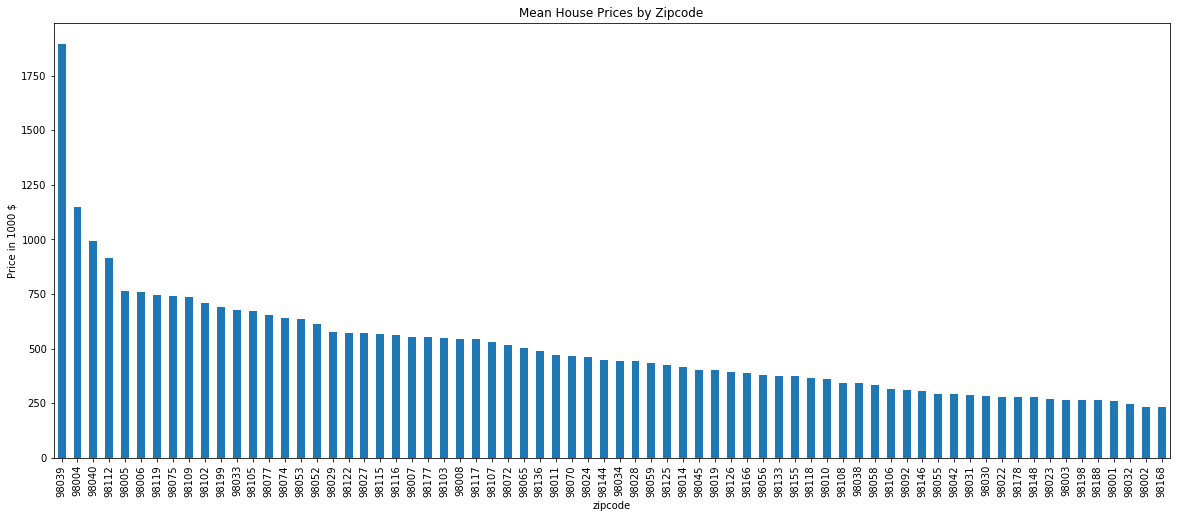

In [43]:
fig = plt.figure(figsize = (20,8));
plt.title("Mean House Prices by Zipcode")
plt.ylabel("Price in 1000 $")
group_zip_df.price.plot.bar();
#cleaned_df = cleaned_df.loc[cleaned_df["zipcode"] != 98039]

Grouping the Houseprices by ZIP-Code clearly shows that there is an extreme outlier (98039) which after a short reseach happens to be home of some of the richest people in the world.

I asume Zip codes are correlated with the price. In Order to take that into account and reduce independent variables for modeling i chose to convert zipcodes to their rank in price

In [44]:
#setting transformed data as new working set
cleaned_df = cleaned_transformed_dummy_df.copy()

In [45]:
zip_rank_df=pd.DataFrame(group_zip_df.reset_index()[["zipcode","price"]])
zip_rank_df=zip_rank_df.sort_values(by="price",ascending=True).reset_index()
zip_rank_df=zip_rank_df.drop("price",axis=1)
zip_rank_df=zip_rank_df.rename(columns={"index":"Zip_worth"})

#insert rank for every zipcode in original dataset
cleaned_df=cleaned_df.merge(zip_rank_df, on="zipcode")

## Modelling

The goal of this project is to build a multivariable linear regression model that will be able to estimate housing price data in Kings County.

### Predictor selection

In [46]:
cleaned_df.head()

,id,date,price,qm_living,qm_lot,waterfront,view,qm_above,qm_basement,yr_built,...,grd__10,grd__11,grd__12,grd__13,cdt__2,cdt__3,cdt__4,cdt__5,cdt__5+,Zip_worth
0,7129300520,2014-10-13,12.309982,4.697062,6.263204,0.0,0.0,4.697062,0,1955,...,0,0,0,0,0,1,0,0,0,60
1,4060000240,2014-06-23,12.232836,4.403715,6.445525,0.0,0.0,4.403715,0,1945,...,0,0,0,0,0,0,1,0,0,60
2,4058801670,2014-07-17,13.005830,5.273485,6.635804,0.0,2.0,5.013974,1,1967,...,0,0,0,0,0,1,0,0,0,60
3,2976800796,2014-09-25,12.371587,4.793912,6.306161,0.0,0.0,4.793912,0,1961,...,0,0,0,0,0,1,0,0,0,60
4,6874200960,2015-02-27,12.043554,4.380725,6.192629,0.0,0.0,4.380725,0,1931,...,0,0,0,0,0,1,0,0,0,60


In [47]:
cleaned_df.columns

Index(['id', 'date', 'price', 'qm_living', 'qm_lot', 'waterfront', 'view',
       'qm_above', 'qm_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'qm_living15', 'qm_lot15', 'bed__2', 'bed__3', 'bed__4',
       'bed__5', 'bed__6+', 'bath__1', 'bath__2', 'bath__3', 'bath__4',
       'bath__5+', 'flr__1.5', 'flr__2.0', 'flr__2.5', 'flr__3.0', 'flr__3.5',
       'grd__2', 'grd__3', 'grd__4', 'grd__5', 'grd__6', 'grd__7', 'grd__8',
       'grd__9', 'grd__10', 'grd__11', 'grd__12', 'grd__13', 'cdt__2',
       'cdt__3', 'cdt__4', 'cdt__5', 'cdt__5+', 'Zip_worth'],
      dtype='object')

In [48]:
df=cleaned_df
target = "price"
predictors = ['waterfront','qm_above','qm_basement',"Zip_worth",'qm_living','bed__2', 'bed__3', 'bed__4',
       'bed__5', 'bed__6+', 'bath__3', 'bath__4',
       'bath__5+', 'flr__1.5', 'flr__2.0', 'flr__2.5', 'grd__3', 'grd__4', 'grd__5', 'grd__6', 'grd__7', 'grd__8',
       'grd__9', 'grd__10', 'grd__11', 'grd__12', 'grd__13']
y=df[target]
X=df[predictors]

### Model building

In [49]:
# train_test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2)
X = X_train
y = y_train

In [50]:
# Build with Statsmodels to get a model summary
import statsmodels.api as sm
model_sm = sm.OLS(y,sm.add_constant(X)).fit()

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [51]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     3054.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        21:46:12   Log-Likelihood:                 1134.0
No. Observations:               17277   AIC:                            -2216.
Df Residuals:                   17251   BIC:                            -2014.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.3285      0.041    251.349      0.000      10.248      10.409
waterfront      0.7034      0.021     34.054      0.000       0.663       0.744
qm_above        0.0795      0.017      4.628      0.000       0.046       0.113
qm_basement     0.0667      0.007      9.287      0.000       0.053       0.081
Zip_worth      -0.0141   9.94e-05   -142.114      0.000      -0.014      -0.014
qm_living       0.3867      0.017     23.137      0.000       0.354       0.419
bed__2         -0.0331      0.019     -1.723      0.085      -0.071       0.005
bed__3         -0.1043      0.019     -5.393      0.000      -0.142      -0.066
bed__4         -0.1106      0.020     -5.563      0.000      -0.150      -0.072
bed__5         -0.1248      0.021     -5.957      0.000      -0.166      -0.084
bed__6+        -0.1351      0.025     -5.474      0.000      -0.184      -0.087
bath__3         0.0782      0.007     11.906      0.000       0.065       0.091
bath__4         0.1149      0.015      7.515      0.000       0.085       0.145
bath__5+        0.1852      0.036      5.185      0.000       0.115       0.255
flr__1.5        0.1058      0.007     16.144      0.000       0.093       0.119
flr__2.0       -0.0422      0.005     -8.641      0.000      -0.052      -0.033
flr__2.5        0.0621      0.021      2.969      0.003       0.021       0.103
grd__3      -1.438e-15   5.75e-17    -24.997      0.000   -1.55e-15   -1.33e-15
grd__4          0.6045      0.044     13.874      0.000       0.519       0.690
grd__5          0.5987      0.018     33.200      0.000       0.563       0.634
grd__6          0.7226      0.011     63.304      0.000       0.700       0.745
grd__7          0.7988      0.010     76.441      0.000       0.778       0.819
grd__8          0.8850      0.011     81.988      0.000       0.864       0.906
grd__9          1.0223      0.012     85.879      0.000       0.999       1.046
grd__10         1.1147      0.013     82.664      0.000       1.088       1.141
grd__11         1.2717      0.017     74.789      0.000       1.238       1.305
grd__12         1.4193      0.029     49.567      0.000       1.363       1.475
grd__13         1.8908      0.076     24.999      0.000       1.743       2.039
==============================================================================
Omnibus:                      543.194   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.190
Skew:                           0.160   Prob(JB):                    1.12e-275
Kurtosis:                       4.287   Cond. No.                     1.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalu

In [52]:
#build with sklearn for model evaluation
model_sk = LinearRegression()
model_sk.fit(X,y);

### Model Evaluation

In [53]:
# Calculat RMSE values

y_train_pred = model_sk.predict(X_train)
y_test_pred = model_sk.predict(X_test)

from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_squared_error(np.exp(y_train),np.exp(y_train_pred)))
RMSE_test = np.sqrt(metrics.mean_squared_error(np.exp(y_test),np.exp(y_test_pred)))

In [54]:
# Verification throgh K-fold
from sklearn.model_selection import cross_val_score
df=cleaned_df
y=df[target]
X=df[predictors]
k_folds_RMSE = round(np.sqrt(-np.mean(cross_val_score(model_sk,X,y,cv=15,scoring="neg_mean_squared_error"))),5)


In [55]:
print ("Train RMSE: ${} K | Test RMSE: ${} K".format(round(RMSE_train/1000),round(RMSE_test/1000)))
print ("mean RMSE derived from K-Folds: log($) {}".format(k_folds_RMSE))
print ("RMSE_train/RMSE_test = {} %".format(abs(round((1-RMSE_train/RMSE_test)*100,2))))
print ("Median Value of a house in KC: ${} K".format(cleaned_non_transformed_df.price.median()/1000))

Train RMSE: $170.0 K | Test RMSE: $165.0 K
mean RMSE derived from K-Folds: log($) 0.22934
RMSE_train/RMSE_test = 3.19 %
Median Value of a house in KC: $450.0 K


### Interpretation

* The model is moderately good at predicting the variation in the Data. This can be estimated by the R2 Value of 0.81+
* Overfitting does not seem to be a problem, since the RMSE values between train and test predictions just differ at roughly 3%
* the RMSE Scroes from K-Folds are not interpretable, since the price values could not been retransformed into Dollars
* The precission of the models prediction is not very accurate, since the mean error is at around 40% of the median house price in KC

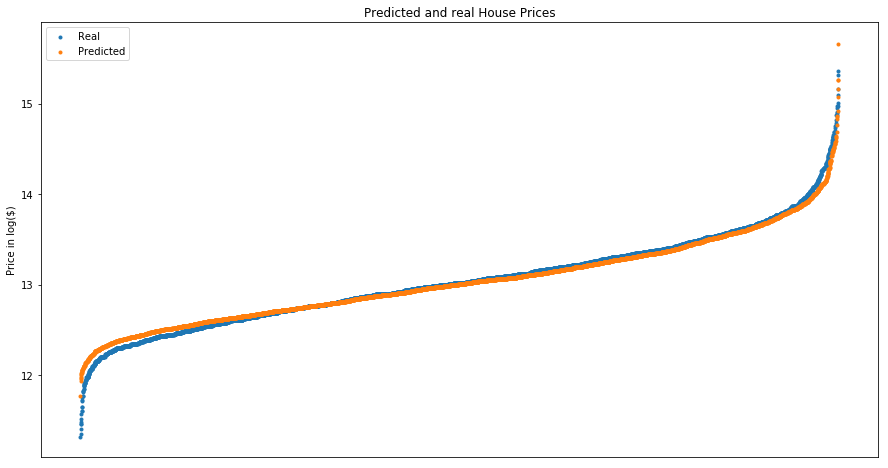

In [56]:
fig = plt.figure(figsize=(15,8))
plt.scatter(y_test.sort_index().index,y_test.sort_values(), label = "Real", marker=".")
plt.scatter(y_test.sort_index().index,pd.Series(y_test_pred).sort_values(), label = "Predicted", marker = ".");
plt.title("Predicted and real House Prices")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("Price in log($)")
plt.legend();

## Export

In [57]:
export_df = dummy_transformation(cleaned_non_transformed_df,col_kwargs,0)

In [58]:
#export_df.to_csv("cleaned_df_export.csv")

## Appendix

"""#Splitting the Dataset in Appartements and Houses

low_thresh = cleaned_df.qm_lot.quantile(q=.1)
high_thresh = cleaned_df.qm_lot.quantile(q=.9)

temp_app = df.loc[df["qm_lot"]<=low_thresh]
temp_house = df.loc[(df["qm_lot"]>low_thresh)&(df["qm_lot"]<high_thresh)]
temp_outliers = df.loc[df["qm_lot"]>=high_thresh]

categorize_function = lambda x: "Manison" if x >= high_thresh else "House" if x >low_thresh else "Appartement"
cleaned_df["kind"] = cleaned_df["qm_lot"].apply(categorize_function)"""

"""cleaned_df.groupby("kind")["price","bedrooms","grade","qm_living","yr_built","floors"].mean()"""


#Setting target (y) and possible predictors(X)
y = cleaned_non_dummy_df.price
X = cleaned_non_dummy_df.drop("price",axis = 1)
X = X.drop("date",axis = 1)
X = X.drop("lat",axis = 1)
X = X.drop("long",axis = 1)
X = X.drop("view",axis = 1)

#feature Ranking
from sklearn.feature_selection import RFE


linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)

selector.support_

selector.ranking_

In [59]:
# old Model

df=cleaned_df
target = "price"
predictors = ['waterfront','qm_above','qm_basement',"Zip_worth",'qm_living','qm_lot','bed__2', 'bed__3', 'bed__4',
       'bed__5', 'bed__6+', 'bath__1', 'bath__2', 'bath__3', 'bath__4',
       'bath__5+', 'flr__1.5', 'flr__2.0', 'flr__2.5', 'flr__3.0', 'flr__3.5','grd__2', 'grd__3', 'grd__4', 'grd__5', 'grd__6', 'grd__7', 'grd__8',
       'grd__9', 'grd__10', 'grd__11', 'grd__12', 'grd__13']
y=df[target]
X=df[predictors]